In [13]:
import yfinance as yf 
import pandas as pd
#yfinance is a library to fetch financial data from Yahoo Finance

data:pd.DataFrame =  yf.download("AAPL", start="2020-01-01", end="2025-01-01")
data.to_csv("aapl_prices.csv")

C:\Users\dhaan\AppData\Local\Temp\ipykernel_8348\406817912.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data:pd.DataFrame =  yf.download("AAPL", start="2020-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed


In [14]:
import pandas as pd
from newsapi import NewsApiClient

newsapi = NewsApiClient(api_key="a7f3930774df422f89548bc580f2abea")

articles = newsapi.get_everything(q="Apple", from_param="2025-05-11", to="2025-06-10", language="en")

headlines = [article['title'] for article in articles['articles']]

df = pd.DataFrame({'headline': headlines})

df.to_csv('headlines.csv', index=False)



In [15]:
import re

def clean_text(text):
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^A-Za-z0-9 ]+", "", text)
    return text.lower()


In [16]:
import yfinance as yf
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from newsapi import NewsApiClient

# === Parameters ===
NEWS_API_KEY = "a7f3930774df422f89548bc580f2abea"  
TICKER = "AAPL"
START_DATE = "2025-05-11"
END_DATE = "2025-06-10"
QUERY = "Apple"

# 1. Fetch stock data
df_price = yf.download(TICKER, start=START_DATE, end=END_DATE)
df_price

C:\Users\dhaan\AppData\Local\Temp\ipykernel_8348\2492261874.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_price = yf.download(TICKER, start=START_DATE, end=END_DATE)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-05-12,210.789993,211.270004,206.750000,210.970001,63775800
2025-05-13,212.929993,213.399994,209.000000,210.429993,51909300
2025-05-14,212.330002,213.940002,210.580002,212.429993,49325800
2025-05-15,211.449997,212.960007,209.539993,210.949997,45029500
2025-05-16,211.259995,212.570007,209.770004,212.360001,54737900
2025-05-19,208.779999,209.479996,204.259995,207.910004,46140500
2025-05-20,206.860001,208.470001,205.029999,207.669998,42496600
2025-05-21,202.089996,207.039993,200.710007,205.169998,59211800


In [17]:

# Fix multi-level column issue if it exists
if isinstance(df_price.columns, pd.MultiIndex):
    df_price.columns = df_price.columns.get_level_values(0)
    
df_price



Price,Close,High,Low,Open,Volume
Date,,,,,
2025-05-12,210.789993,211.270004,206.750000,210.970001,63775800
2025-05-13,212.929993,213.399994,209.000000,210.429993,51909300
2025-05-14,212.330002,213.940002,210.580002,212.429993,49325800
2025-05-15,211.449997,212.960007,209.539993,210.949997,45029500
2025-05-16,211.259995,212.570007,209.770004,212.360001,54737900
2025-05-19,208.779999,209.479996,204.259995,207.910004,46140500
2025-05-20,206.860001,208.470001,205.029999,207.669998,42496600
2025-05-21,202.089996,207.039993,200.710007,205.169998,59211800
2025-05-22,201.360001,202.750000,199.699997,200.710007,46742400


In [18]:

df_price['pct_change'] = df_price['Close'].pct_change() * 100
df_price

Price,Close,High,Low,Open,Volume,pct_change
Date,,,,,,
2025-05-12,210.789993,211.270004,206.750000,210.970001,63775800,NaN
2025-05-13,212.929993,213.399994,209.000000,210.429993,51909300,1.015228
2025-05-14,212.330002,213.940002,210.580002,212.429993,49325800,-0.281778
2025-05-15,211.449997,212.960007,209.539993,210.949997,45029500,-0.414452
2025-05-16,211.259995,212.570007,209.770004,212.360001,54737900,-0.089857
2025-05-19,208.779999,209.479996,204.259995,207.910004,46140500,-1.173907
2025-05-20,206.860001,208.470001,205.029999,207.669998,42496600,-0.919627
2025-05-21,202.089996,207.039993,200.710007,205.169998,59211800,-2.305909
2025-05-22,201.360001,202.750000,199.699997,200.710007,46742400,-0.361223


In [19]:

df_price.reset_index(inplace=True)
df_price

Price,Date,Close,High,Low,Open,Volume,pct_change
0,2025-05-12,210.789993,211.270004,206.750000,210.970001,63775800,NaN
1,2025-05-13,212.929993,213.399994,209.000000,210.429993,51909300,1.015228
2,2025-05-14,212.330002,213.940002,210.580002,212.429993,49325800,-0.281778
3,2025-05-15,211.449997,212.960007,209.539993,210.949997,45029500,-0.414452
4,2025-05-16,211.259995,212.570007,209.770004,212.360001,54737900,-0.089857
5,2025-05-19,208.779999,209.479996,204.259995,207.910004,46140500,-1.173907
6,2025-05-20,206.860001,208.470001,205.029999,207.669998,42496600,-0.919627
7,2025-05-21,202.089996,207.039993,200.710007,205.169998,59211800,-2.305909
8,2025-05-22,201.360001,202.750000,199.699997,200.710007,46742400,-0.361223
9,2025-05-23,195.270004,197.699997,193.460007,193.669998,78432900,-3.024432


In [20]:

# 2. Fetch news headlines from NewsAPI
newsapi = NewsApiClient(api_key=NEWS_API_KEY)
all_articles = newsapi.get_everything(q=QUERY,
                                      from_param=START_DATE,
                                      to=END_DATE,
                                      language='en',
                                      sort_by='relevancy',
                                      page_size=100)
all_articles['articles']

[{'source': {'id': 'the-verge', 'name': 'The Verge'},
  'author': 'Jay Peters',
  'title': 'Apple’s new Games app lets you challenge your friends',
  'description': 'Apple is launching a new app that acts as a central hub for the games and gaming features across its platforms. The new Apple Games app combines Apple Arcade, App Store game recommendations, your App Store game library, and your friends list into a single loc…',
  'url': 'https://www.theverge.com/news/678319/apple-games-app-wwdc-2025',
  'urlToImage': 'https://platform.theverge.com/wp-content/uploads/sites/2/2025/06/Apple-WWDC25-iPadOS-26-Games-app-250609_big.jpg.large_2x.jpg?quality=90&strip=all&crop=0%2C13.350785340314%2C100%2C73.298429319372&w=1200',
  'publishedAt': '2025-06-09T18:09:03Z',
  'content': 'Another gaming initiative from Apple thats meant to be a central hub for players.\r\nAnother gaming initiative from Apple thats meant to be a central hub for players.\r\nApple is launching a new app that… [+1675 chars]'

In [21]:

# Extract headlines and published dates
articles = all_articles['articles']
data = []
for article in articles:
    title = article['title']
    date = article['publishedAt'][:10]  # Extract YYYY-MM-DD
    data.append({'date': date, 'headline': title})
data

[{'date': '2025-06-09',
  'headline': 'Apple’s new Games app lets you challenge your friends'},
 {'date': '2025-05-28',
  'headline': 'Apple’s DIY repair program now covers iPads'},
 {'date': '2025-05-27',
  'headline': 'Apple is ready to replace Game Center with a more Xbox-like gaming app'},
 {'date': '2025-06-09',
  'headline': 'Apple WWDC 2025: the 13 biggest announcements'},
 {'date': '2025-05-13', 'headline': 'How to Use Apple Maps on the Web'},
 {'date': '2025-05-17',
  'headline': 'Epic asks judge to make Apple let Fortnite back on the US App Store'},
 {'date': '2025-05-11',
  'headline': 'Apple may release a ‘mostly glass, curved iPhone’ in 2027'},
 {'date': '2025-05-18',
  'headline': 'Apple is trying to get ‘LLM Siri’ back on track'},
 {'date': '2025-06-04',
  'headline': 'Apple ordered to keep web links in the App Store'},
 {'date': '2025-06-09',
  'headline': 'WWDC 2025 live blog: a fresh new look at iOS, macOS, and more'},
 {'date': '2025-05-16',
  'headline': 'Fortnite f

In [22]:

df_sentiment = pd.DataFrame(data)
df_sentiment['date'] = pd.to_datetime(df_sentiment['date']).dt.date
df_sentiment


,date,headline
0,2025-06-09,Apple’s new Games app lets you challenge your ...
1,2025-05-28,Apple’s DIY repair program now covers iPads
2,2025-05-27,Apple is ready to replace Game Center with a m...
3,2025-06-09,Apple WWDC 2025: the 13 biggest announcements
4,2025-05-13,How to Use Apple Maps on the Web
...,...,...
95,2025-06-09,Apple Store With Updated Design Opening in Ari...
96,2025-05-18,Apple Will Reportedly Let iPhone Users in the ...
97,2025-06-10,watchOS 26 Features New Gesture to Dismiss Not...
98,2025-06-05,WWDC 2025: What to Expect From tvOS 26


In [23]:

# 3. Sentiment analysis on headlines
analyzer = SentimentIntensityAnalyzer()

result = analyzer.polarity_scores("This is a great day for Apple Inc.")
for ind, row in df_sentiment.iterrows():
    df_sentiment.at[ind, 'compound'] = analyzer.polarity_scores(row['headline'])['compound']

df_sentiment

,date,headline,compound
0,2025-06-09,Apple’s new Games app lets you challenge your ...,0.5267
1,2025-05-28,Apple’s DIY repair program now covers iPads,0.0000
2,2025-05-27,Apple is ready to replace Game Center with a m...,0.3612
3,2025-06-09,Apple WWDC 2025: the 13 biggest announcements,0.0000
4,2025-05-13,How to Use Apple Maps on the Web,0.0000
...,...,...,...
95,2025-06-09,Apple Store With Updated Design Opening in Ari...,0.0000
96,2025-05-18,Apple Will Reportedly Let iPhone Users in the ...,0.0000
97,2025-06-10,watchOS 26 Features New Gesture to Dismiss Not...,0.0000
98,2025-06-05,WWDC 2025: What to Expect From tvOS 26,0.0000


In [24]:
df_sentiment['sentiment_score'] = df_sentiment['headline'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

def label_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df_sentiment['sentiment'] = df_sentiment['sentiment_score'].apply(lambda x: label_sentiment(x))
df_sentiment

,date,headline,compound,sentiment_score,sentiment
0,2025-06-09,Apple’s new Games app lets you challenge your ...,0.5267,0.5267,Positive
1,2025-05-28,Apple’s DIY repair program now covers iPads,0.0000,0.0000,Neutral
2,2025-05-27,Apple is ready to replace Game Center with a m...,0.3612,0.3612,Positive
3,2025-06-09,Apple WWDC 2025: the 13 biggest announcements,0.0000,0.0000,Neutral
4,2025-05-13,How to Use Apple Maps on the Web,0.0000,0.0000,Neutral
...,...,...,...,...,...
95,2025-06-09,Apple Store With Updated Design Opening in Ari...,0.0000,0.0000,Neutral
96,2025-05-18,Apple Will Reportedly Let iPhone Users in the ...,0.0000,0.0000,Neutral
97,2025-06-10,watchOS 26 Features New Gesture to Dismiss Not...,0.0000,0.0000,Neutral
98,2025-06-05,WWDC 2025: What to Expect From tvOS 26,0.0000,0.0000,Neutral


In [25]:


# 4. Merge sentiment with stock % change on date
df_price['date'] = pd.to_datetime(df_price['Date']).dt.date
df_merged = pd.merge(df_sentiment, df_price[['date', 'pct_change']], on='date', how='inner')

# 5. Show results
df_merged[['date', 'headline', 'sentiment', 'pct_change']]


,date,headline,sentiment,pct_change
0,2025-06-09,Apple’s new Games app lets you challenge your ...,Positive,-1.211260
1,2025-05-28,Apple’s DIY repair program now covers iPads,Neutral,0.104886
2,2025-05-27,Apple is ready to replace Game Center with a m...,Positive,2.529832
3,2025-06-09,Apple WWDC 2025: the 13 biggest announcements,Neutral,-1.211260
4,2025-05-13,How to Use Apple Maps on the Web,Neutral,1.015228
...,...,...,...,...
72,2025-05-14,Apple Prepares for WWDC 2025 With Developer Ap...,Neutral,-0.281778
73,2025-06-06,Apple TV+ Announces MLB Friday Night Baseball ...,Neutral,1.639831
74,2025-05-30,OpenAI wants ChatGPT to be a ‘super assistant’...,Neutral,0.450117
75,2025-06-09,Apple Store With Updated Design Opening in Ari...,Neutral,-1.211260


In [26]:

# 6. Calculate & print correlation
corr = df_merged['sentiment_score'].corr(df_merged['pct_change'])
print(f"\nCorrelation between sentiment score and price % change: {corr:.3f}")



Correlation between sentiment score and price % change: -0.018


In [27]:
df.to_csv('cleaned_headlines_sentiment.csv', index=False)


In [28]:
df_merged

,date,headline,compound,sentiment_score,sentiment,pct_change
0,2025-06-09,Apple’s new Games app lets you challenge your ...,0.5267,0.5267,Positive,-1.211260
1,2025-05-28,Apple’s DIY repair program now covers iPads,0.0000,0.0000,Neutral,0.104886
2,2025-05-27,Apple is ready to replace Game Center with a m...,0.3612,0.3612,Positive,2.529832
3,2025-06-09,Apple WWDC 2025: the 13 biggest announcements,0.0000,0.0000,Neutral,-1.211260
4,2025-05-13,How to Use Apple Maps on the Web,0.0000,0.0000,Neutral,1.015228
...,...,...,...,...,...,...
72,2025-05-14,Apple Prepares for WWDC 2025 With Developer Ap...,0.0000,0.0000,Neutral,-0.281778
73,2025-06-06,Apple TV+ Announces MLB Friday Night Baseball ...,0.0000,0.0000,Neutral,1.639831
74,2025-05-30,OpenAI wants ChatGPT to be a ‘super assistant’...,0.0000,0.0000,Neutral,0.450117
75,2025-06-09,Apple Store With Updated Design Opening in Ari...,0.0000,0.0000,Neutral,-1.211260


In [29]:
# 7. Create binary label for pct_change: 1 if pct_change > 0, else 0
df_merged['pct_change_label'] = (df_merged['pct_change'] > 0).astype(int)
df_merged[['date', 'headline', 'sentiment', 'pct_change', 'pct_change_label']].head()

,date,headline,sentiment,pct_change,pct_change_label
0,2025-06-09,Apple’s new Games app lets you challenge your ...,Positive,-1.211260,0
1,2025-05-28,Apple’s DIY repair program now covers iPads,Neutral,0.104886,1
2,2025-05-27,Apple is ready to replace Game Center with a m...,Positive,2.529832,1
3,2025-06-09,Apple WWDC 2025: the 13 biggest announcements,Neutral,-1.211260,0
4,2025-05-13,How to Use Apple Maps on the Web,Neutral,1.015228,1


In [32]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, dtype=int)
sentiment_arr = encoder.fit_transform(df_merged[['sentiment']])
sentiment_df = pd.DataFrame(sentiment_arr, columns=encoder.get_feature_names_out(['sentiment']), index=df_merged.index)
df_merged = pd.concat([df_merged, sentiment_df], axis=1)
print(df_merged[['date', 'headline', 'pct_change', 'pct_change_label'] + list(sentiment_df.columns)].head())

         date                                           headline  pct_change  \
0  2025-06-09  Apple’s new Games app lets you challenge your ...   -1.211260   
1  2025-05-28        Apple’s DIY repair program now covers iPads    0.104886   
2  2025-05-27  Apple is ready to replace Game Center with a m...    2.529832   
3  2025-06-09      Apple WWDC 2025: the 13 biggest announcements   -1.211260   
4  2025-05-13                   How to Use Apple Maps on the Web    1.015228   

   pct_change_label  sentiment_Negative  sentiment_Neutral  sentiment_Positive  
0                 0                   0                  0                   1  
1                 1                   0                  1                   0  
2                 1                   0                  0                   1  
3                 0                   0                  1                   0  
4                 1                   0                  1                   0  


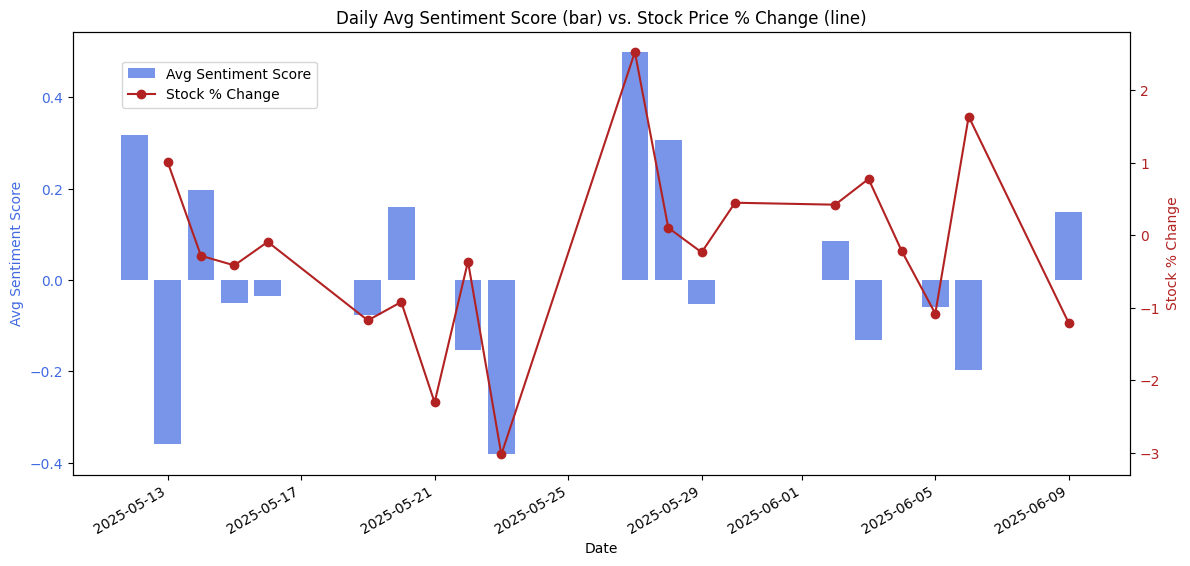

In [ ]:
import matplotlib.pyplot as plt

# Prepare daily average sentiment and daily pct_change
daily = df_merged.groupby('date').agg({'sentiment_score': 'mean', 'pct_change': 'mean'}).reset_index()

# Visualization: Daily Avg Sentiment Score (bar) vs. Stock Price % Change (line)
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.bar(daily['date'], daily['sentiment_score'], color='royalblue', label='Avg Sentiment Score', alpha=0.7)
ax1.set_ylabel('Avg Sentiment Score', color='royalblue')
ax1.set_xlabel('Date')
ax1.tick_params(axis='y', labelcolor='royalblue')

ax2 = ax1.twinx()
ax2.plot(daily['date'], daily['pct_change'], color='firebrick', marker='o', label='Stock % Change')
ax2.set_ylabel('Stock % Change', color='firebrick')
ax2.tick_params(axis='y', labelcolor='firebrick')

plt.title('Daily Avg Sentiment Score (bar) vs. Stock Price % Change (line)')
fig.tight_layout()
fig.autofmt_xdate()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.show()

## Train and Evaluate RandomForest & Logistic Regression Models
We will use the sentiment and stock data to train RandomForest and Logistic Regression classifiers to predict whether the stock price will go up (binary label). We'll visualize the results and show model performance.

RandomForest Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.94      0.82        49
           1       0.00      0.00      0.00        17

    accuracy                           0.70        66
   macro avg       0.37      0.47      0.41        66
weighted avg       0.54      0.70      0.61        66

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        49
           1       0.00      0.00      0.00        17

    accuracy                           0.74        66
   macro avg       0.37      0.50      0.43        66
weighted avg       0.55      0.74      0.63        66

RandomForest Accuracy: 0.697
Logistic Regression Accuracy: 0.742


c:\Users\dhaan\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\dhaan\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\dhaan\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


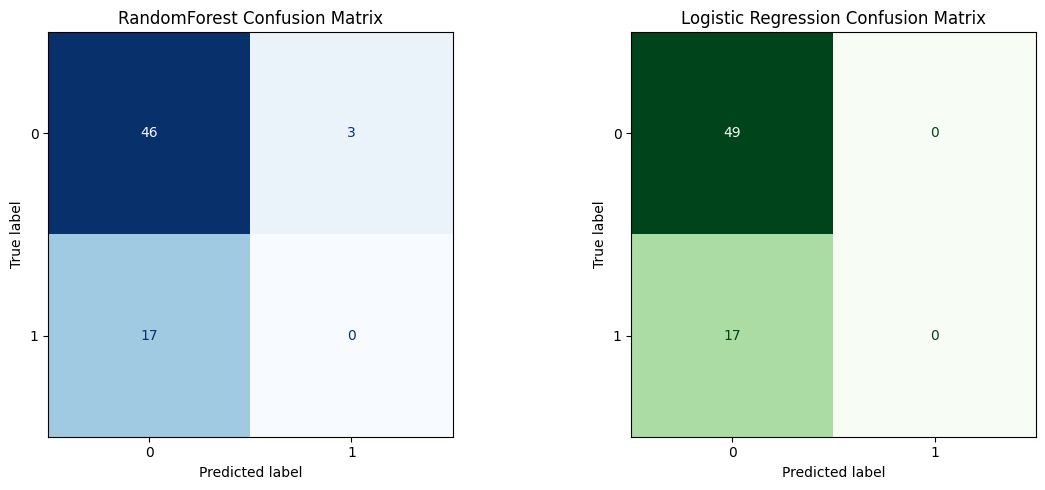

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Features: One-hot encoded sentiment columns
sentiment_cols = [col for col in df_merged.columns if col.startswith('sentiment_')]
X = df_merged[sentiment_cols]
y = df_merged['pct_change_label']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.85, random_state=42)

# RandomForest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Logistic Regression
lr = LogisticRegression(max_iter=200, random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Evaluation
print('RandomForest Classification Report:')
print(classification_report(y_test, y_pred_rf))
print('Logistic Regression Classification Report:')
print(classification_report(y_test, y_pred_lr))

# Accuracy
print(f'RandomForest Accuracy: {accuracy_score(y_test, y_pred_rf):.3f}')
print(f'Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_lr):.3f}')

# Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, ax=axes[0], cmap='Blues', colorbar=False)
axes[0].set_title('RandomForest Confusion Matrix')
ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test, ax=axes[1], cmap='Greens', colorbar=False)
axes[1].set_title('Logistic Regression Confusion Matrix')
plt.tight_layout()
plt.show()

### Visualize Correct vs Wrong Predictions
We will visualize which predictions were correct and which were wrong for both models, using the test set.

C:\Users\dhaan\AppData\Local\Temp\ipykernel_8348\157594873.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RF Correct', data=results, palette=['salmon', 'mediumseagreen'])


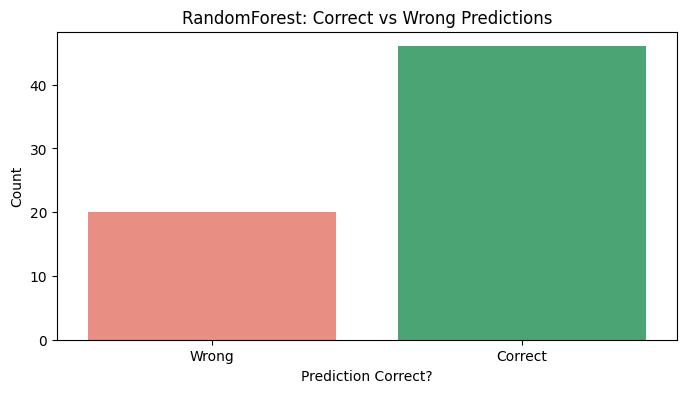

C:\Users\dhaan\AppData\Local\Temp\ipykernel_8348\157594873.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='LR Correct', data=results, palette=['salmon', 'mediumseagreen'])


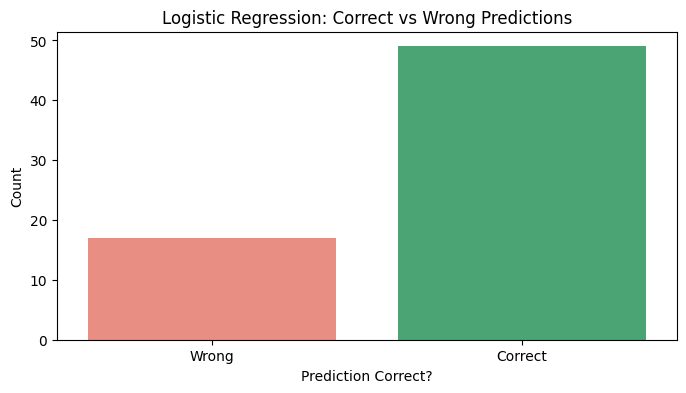

In [43]:
import numpy as np

# Add prediction results to test set for visualization
results = X_test.copy()
results['True Label'] = y_test.values
results['RF Prediction'] = y_pred_rf
results['LR Prediction'] = y_pred_lr
results['RF Correct'] = results['True Label'] == results['RF Prediction']
results['LR Correct'] = results['True Label'] == results['LR Prediction']

# Plot correct vs wrong for RandomForest
plt.figure(figsize=(8, 4))
sns.countplot(x='RF Correct', data=results, palette=['salmon', 'mediumseagreen'])
plt.title('RandomForest: Correct vs Wrong Predictions')
plt.xlabel('Prediction Correct?')
plt.ylabel('Count')
plt.xticks([0, 1], ['Wrong', 'Correct'])
plt.show()

# Plot correct vs wrong for Logistic Regression
plt.figure(figsize=(8, 4))
sns.countplot(x='LR Correct', data=results, palette=['salmon', 'mediumseagreen'])
plt.title('Logistic Regression: Correct vs Wrong Predictions')
plt.xlabel('Prediction Correct?')
plt.ylabel('Count')
plt.xticks([0, 1], ['Wrong', 'Correct'])
plt.show()